In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(11)
%matplotlib inline

## Load H2o

NOTE: to start H2o, first use Terminal to navigate to *usr/local/lib/python3.6/site-packages/h2o/backend/bin* and enter the command *java -jar h2o.jar*

In [6]:
# Load the H2O library and start up the H2O cluster locally on your machine
import h2o
from h2o.estimators.glrm import H2OGeneralizedLowRankEstimator

# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,06 secs
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.11
H2O cluster version age:,1 month and 6 days
H2O cluster name:,garrettfiddler
H2O cluster total nodes:,1
H2O cluster free memory:,2 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


## Load data

In [3]:
khous_df = pd.read_csv('khous_train.csv')

In [38]:
khous_df.shape

(1460, 81)

In [41]:
khous_df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [4]:
khous_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
khous_null_df = khous_df.mask(np.random.random(khous_df.shape) < .5)

## Convert data to H2o

In [7]:
khous_h2 = h2o.H2OFrame(khous_df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [8]:
khous_null_h2 = h2o.H2OFrame(khous_null_df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


## Build Models

In [9]:
loss_by_type = {np.dtype('object'):"Categorical", 
                np.dtype('int64'):"Quadratic", 
                np.dtype('float64'):"Quadratic", 
                np.dtype('bool'):"Hinge"}
col_loss_types = [loss_by_type[obj_type] for obj_type in khous_df.dtypes]

In [10]:
glrmodel_2 = H2OGeneralizedLowRankEstimator(k=10, 
                                       max_iterations=100, 
                                       loss_by_col=col_loss_types, 
                                       impute_original=True)

In [12]:
glrmodel_2.train(y='SalePrice', training_frame=khous_h2)

glrm Model Build progress: |██████████████████████████████████████████████| 100%


In [15]:
glrmodel_3 = H2OGeneralizedLowRankEstimator(k=10, 
                                       max_iterations=100, 
                                       loss_by_col=col_loss_types, 
                                       impute_original=True)

In [16]:
glrmodel_2.train(y='SalePrice', training_frame=khous_null_h2)

H2OResponseError: ModelBuilderErrorV3  (water.exceptions.H2OModelBuilderIllegalArgumentException):
    timestamp = 1530381473366
    error_url = '/3/ModelBuilders/glrm'
    msg = 'Illegal argument(s) for GLRM model: GLRM_model_python_1530380632407_3.  Details: ERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 0\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 1\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 3\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 19\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 26\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 38\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 43\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 45\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 47\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 49\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 50\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 54\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 59\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 62\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 67\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 68\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 75'
    dev_msg = 'Illegal argument(s) for GLRM model: GLRM_model_python_1530380632407_3.  Details: ERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 0\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 1\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 3\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 19\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 26\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 38\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 43\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 45\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 47\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 49\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 50\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 54\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 59\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 62\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 67\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 68\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 75'
    http_status = 412
    values = {'messages': [{'_log_level': 5, '_field_name': '_keep_cross_validation_predictions', '_message': 'Only for cross-validation.'}, {'_log_level': 5, '_field_name': '_keep_cross_validation_fold_assignment', '_message': 'Only for cross-validation.'}, {'_log_level': 5, '_field_name': '_fold_assignment', '_message': 'Only for cross-validation.'}, {'_log_level': 5, '_field_name': '_tweedie_power', '_message': 'Only for Tweedie Distribution.'}, {'_log_level': 5, '_field_name': '_response_column', '_message': 'Ignored for unsupervised methods.'}, {'_log_level': 5, '_field_name': '_balance_classes', '_message': 'Ignored for unsupervised methods.'}, {'_log_level': 5, '_field_name': '_class_sampling_factors', '_message': 'Ignored for unsupervised methods.'}, {'_log_level': 5, '_field_name': '_max_after_balance_size', '_message': 'Ignored for unsupervised methods.'}, {'_log_level': 5, '_field_name': '_max_confusion_matrix_size', '_message': 'Ignored for unsupervised methods.'}, {'_log_level': 1, '_field_name': '_loss_by_col', '_message': 'Loss function Quadratic cannot be applied to categorical column 0'}, {'_log_level': 1, '_field_name': '_loss_by_col', '_message': 'Loss function Quadratic cannot be applied to categorical column 1'}, {'_log_level': 1, '_field_name': '_loss_by_col', '_message': 'Loss function Quadratic cannot be applied to categorical column 3'}, {'_log_level': 1, '_field_name': '_loss_by_col', '_message': 'Loss function Quadratic cannot be applied to categorical column 19'}, {'_log_level': 1, '_field_name': '_loss_by_col', '_message': 'Loss function Quadratic cannot be applied to categorical column 26'}, {'_log_level': 1, '_field_name': '_loss_by_col', '_message': 'Loss function Quadratic cannot be applied to categorical column 38'}, {'_log_level': 1, '_field_name': '_loss_by_col', '_message': 'Loss function Quadratic cannot be applied to categorical column 43'}, {'_log_level': 1, '_field_name': '_loss_by_col', '_message': 'Loss function Quadratic cannot be applied to categorical column 45'}, {'_log_level': 1, '_field_name': '_loss_by_col', '_message': 'Loss function Quadratic cannot be applied to categorical column 47'}, {'_log_level': 1, '_field_name': '_loss_by_col', '_message': 'Loss function Quadratic cannot be applied to categorical column 49'}, {'_log_level': 1, '_field_name': '_loss_by_col', '_message': 'Loss function Quadratic cannot be applied to categorical column 50'}, {'_log_level': 1, '_field_name': '_loss_by_col', '_message': 'Loss function Quadratic cannot be applied to categorical column 54'}, {'_log_level': 1, '_field_name': '_loss_by_col', '_message': 'Loss function Quadratic cannot be applied to categorical column 59'}, {'_log_level': 1, '_field_name': '_loss_by_col', '_message': 'Loss function Quadratic cannot be applied to categorical column 62'}, {'_log_level': 1, '_field_name': '_loss_by_col', '_message': 'Loss function Quadratic cannot be applied to categorical column 67'}, {'_log_level': 1, '_field_name': '_loss_by_col', '_message': 'Loss function Quadratic cannot be applied to categorical column 68'}, {'_log_level': 1, '_field_name': '_loss_by_col', '_message': 'Loss function Quadratic cannot be applied to categorical column 75'}], 'algo': 'GLRM', 'parameters': {'_train': {'name': 'Key_Frame__upload_9e4bb32fff9198b7c68f8120650c4933.hex', 'type': 'Key'}, '_valid': None, '_nfolds': 0, '_keep_cross_validation_predictions': False, '_keep_cross_validation_fold_assignment': False, '_parallelize_cross_validation': True, '_auto_rebalance': True, '_seed': -1, '_fold_assignment': 'AUTO', '_categorical_encoding': 'AUTO', '_max_categorical_levels': 10, '_distribution': 'AUTO', '_tweedie_power': 1.5, '_quantile_alpha': 0.5, '_huber_alpha': 0.9, '_ignored_columns': None, '_ignore_const_cols': True, '_weights_column': None, '_offset_column': None, '_fold_column': None, '_is_cv_model': False, '_score_each_iteration': False, '_max_runtime_secs': 0.0, '_stopping_rounds': 0, '_stopping_metric': 'AUTO', '_stopping_tolerance': 0.001, '_response_column': None, '_balance_classes': False, '_max_after_balance_size': 5.0, '_class_sampling_factors': None, '_max_confusion_matrix_size': 20, '_checkpoint': None, '_pretrained_autoencoder': None, '_custom_metric_func': None, '_transform': 'NONE', '_k': 10, '_init': 'PlusPlus', '_svd_method': 'Randomized', '_user_y': None, '_user_x': None, '_expand_user_y': True, '_loss': 'Quadratic', '_multi_loss': 'Categorical', '_period': 1, '_loss_by_col': ['Quadratic', 'Quadratic', 'Categorical', 'Quadratic', 'Quadratic', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Quadratic', 'Quadratic', 'Quadratic', 'Quadratic', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Quadratic', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Quadratic', 'Categorical', 'Quadratic', 'Quadratic', 'Quadratic', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Quadratic', 'Quadratic', 'Quadratic', 'Quadratic', 'Quadratic', 'Quadratic', 'Quadratic', 'Quadratic', 'Quadratic', 'Quadratic', 'Categorical', 'Quadratic', 'Categorical', 'Quadratic', 'Categorical', 'Categorical', 'Quadratic', 'Categorical', 'Quadratic', 'Quadratic', 'Categorical', 'Categorical', 'Categorical', 'Quadratic', 'Quadratic', 'Quadratic', 'Quadratic', 'Quadratic', 'Quadratic', 'Categorical', 'Categorical', 'Categorical', 'Quadratic', 'Quadratic', 'Quadratic', 'Categorical', 'Categorical', 'Quadratic'], '_loss_by_col_idx': None, '_regularization_x': 'None', '_regularization_y': 'None', '_gamma_x': 0.0, '_gamma_y': 0.0, '_max_iterations': 100, '_max_updates': 2000, '_init_step_size': 1.0, '_min_step_size': 0.0001, '_representation_name': None, '_recover_svd': False, '_impute_original': True, '_verbose': True}, 'error_count': 34}
    exception_msg = 'Illegal argument(s) for GLRM model: GLRM_model_python_1530380632407_3.  Details: ERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 0\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 1\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 3\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 19\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 26\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 38\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 43\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 45\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 47\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 49\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 50\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 54\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 59\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 62\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 67\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 68\nERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 75'
    stacktrace =
        water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GLRM model: GLRM_model_python_1530380632407_3.  Details: ERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 0
ERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 1
ERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 3
ERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 19
ERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 26
ERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 38
ERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 43
ERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 45
ERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 47
ERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 49
ERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 50
ERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 54
ERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 59
ERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 62
ERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 67
ERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 68
ERRR on field: _loss_by_col: Loss function Quadratic cannot be applied to categorical column 75
        water.exceptions.H2OModelBuilderIllegalArgumentException.makeFromBuilder(H2OModelBuilderIllegalArgumentException.java:20)
        hex.ModelBuilder.trainModel(ModelBuilder.java:239)
        water.api.ModelBuilderHandler.handle(ModelBuilderHandler.java:64)
        water.api.ModelBuilderHandler.handle(ModelBuilderHandler.java:17)
        water.api.RequestServer.serve(RequestServer.java:451)
        water.api.RequestServer.doGeneric(RequestServer.java:296)
        water.api.RequestServer.doPost(RequestServer.java:222)
        javax.servlet.http.HttpServlet.service(HttpServlet.java:755)
        javax.servlet.http.HttpServlet.service(HttpServlet.java:848)
        org.eclipse.jetty.servlet.ServletHolder.handle(ServletHolder.java:684)
        org.eclipse.jetty.servlet.ServletHandler.doHandle(ServletHandler.java:503)
        org.eclipse.jetty.server.handler.ContextHandler.doHandle(ContextHandler.java:1086)
        org.eclipse.jetty.servlet.ServletHandler.doScope(ServletHandler.java:429)
        org.eclipse.jetty.server.handler.ContextHandler.doScope(ContextHandler.java:1020)
        org.eclipse.jetty.server.handler.ScopedHandler.handle(ScopedHandler.java:135)
        org.eclipse.jetty.server.handler.HandlerCollection.handle(HandlerCollection.java:154)
        org.eclipse.jetty.server.handler.HandlerWrapper.handle(HandlerWrapper.java:116)
        water.JettyHTTPD$LoginHandler.handle(JettyHTTPD.java:197)
        org.eclipse.jetty.server.handler.HandlerCollection.handle(HandlerCollection.java:154)
        org.eclipse.jetty.server.handler.HandlerWrapper.handle(HandlerWrapper.java:116)
        org.eclipse.jetty.server.Server.handle(Server.java:370)
        org.eclipse.jetty.server.AbstractHttpConnection.handleRequest(AbstractHttpConnection.java:494)
        org.eclipse.jetty.server.BlockingHttpConnection.handleRequest(BlockingHttpConnection.java:53)
        org.eclipse.jetty.server.AbstractHttpConnection.content(AbstractHttpConnection.java:982)
        org.eclipse.jetty.server.AbstractHttpConnection$RequestHandler.content(AbstractHttpConnection.java:1043)
        org.eclipse.jetty.http.HttpParser.parseNext(HttpParser.java:865)
        org.eclipse.jetty.http.HttpParser.parseAvailable(HttpParser.java:240)
        org.eclipse.jetty.server.BlockingHttpConnection.handle(BlockingHttpConnection.java:72)
        org.eclipse.jetty.server.bio.SocketConnector$ConnectorEndPoint.run(SocketConnector.java:264)
        org.eclipse.jetty.util.thread.QueuedThreadPool.runJob(QueuedThreadPool.java:608)
        org.eclipse.jetty.util.thread.QueuedThreadPool$3.run(QueuedThreadPool.java:543)
        java.base/java.lang.Thread.run(Thread.java:844)
    parameters = {'__meta': {'schema_version': 3, 'schema_name': 'GLRMParametersV3', 'schema_type': 'GLRMParameters'}, 'model_id': None, 'training_frame': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'Key_Frame__upload_9e4bb32fff9198b7c68f8120650c4933.hex', 'type': 'Key<Frame>', 'URL': '/3/Frames/Key_Frame__upload_9e4bb32fff9198b7c68f8120650c4933.hex'}, 'validation_frame': None, 'nfolds': 0, 'keep_cross_validation_predictions': False, 'keep_cross_validation_fold_assignment': False, 'parallelize_cross_validation': True, 'distribution': 'AUTO', 'tweedie_power': 1.5, 'quantile_alpha': 0.5, 'huber_alpha': 0.9, 'response_column': None, 'weights_column': None, 'offset_column': None, 'fold_column': None, 'fold_assignment': 'AUTO', 'categorical_encoding': 'AUTO', 'max_categorical_levels': 10, 'ignored_columns': None, 'ignore_const_cols': True, 'score_each_iteration': False, 'checkpoint': None, 'stopping_rounds': 0, 'max_runtime_secs': 0.0, 'stopping_metric': 'AUTO', 'stopping_tolerance': 0.001, 'custom_metric_func': None, 'transform': 'NONE', 'k': 10, 'loss': 'Quadratic', 'multi_loss': 'Categorical', 'loss_by_col': ['Quadratic', 'Quadratic', 'Categorical', 'Quadratic', 'Quadratic', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Quadratic', 'Quadratic', 'Quadratic', 'Quadratic', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Quadratic', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Quadratic', 'Categorical', 'Quadratic', 'Quadratic', 'Quadratic', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Quadratic', 'Quadratic', 'Quadratic', 'Quadratic', 'Quadratic', 'Quadratic', 'Quadratic', 'Quadratic', 'Quadratic', 'Quadratic', 'Categorical', 'Quadratic', 'Categorical', 'Quadratic', 'Categorical', 'Categorical', 'Quadratic', 'Categorical', 'Quadratic', 'Quadratic', 'Categorical', 'Categorical', 'Categorical', 'Quadratic', 'Quadratic', 'Quadratic', 'Quadratic', 'Quadratic', 'Quadratic', 'Categorical', 'Categorical', 'Categorical', 'Quadratic', 'Quadratic', 'Quadratic', 'Categorical', 'Categorical', 'Quadratic'], 'loss_by_col_idx': None, 'period': 1, 'regularization_x': 'None', 'regularization_y': 'None', 'gamma_x': 0.0, 'gamma_y': 0.0, 'max_iterations': 100, 'max_updates': 2000, 'init_step_size': 1.0, 'min_step_size': 0.0001, 'seed': -1, 'init': 'PlusPlus', 'svd_method': 'Randomized', 'user_y': None, 'user_x': None, 'loading_name': None, 'expand_user_y': True, 'impute_original': True, 'recover_svd': False}
    messages = [{'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'keep_cross_validation_predictions', 'message': 'Only for cross-validation.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'keep_cross_validation_fold_assignment', 'message': 'Only for cross-validation.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'fold_assignment', 'message': 'Only for cross-validation.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'tweedie_power', 'message': 'Only for Tweedie Distribution.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'response_column', 'message': 'Ignored for unsupervised methods.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'balance_classes', 'message': 'Ignored for unsupervised methods.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'class_sampling_factors', 'message': 'Ignored for unsupervised methods.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'max_after_balance_size', 'message': 'Ignored for unsupervised methods.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'TRACE', 'field_name': 'max_confusion_matrix_size', 'message': 'Ignored for unsupervised methods.'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'loss_by_col', 'message': 'Loss function Quadratic cannot be applied to categorical column 0'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'loss_by_col', 'message': 'Loss function Quadratic cannot be applied to categorical column 1'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'loss_by_col', 'message': 'Loss function Quadratic cannot be applied to categorical column 3'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'loss_by_col', 'message': 'Loss function Quadratic cannot be applied to categorical column 19'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'loss_by_col', 'message': 'Loss function Quadratic cannot be applied to categorical column 26'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'loss_by_col', 'message': 'Loss function Quadratic cannot be applied to categorical column 38'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'loss_by_col', 'message': 'Loss function Quadratic cannot be applied to categorical column 43'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'loss_by_col', 'message': 'Loss function Quadratic cannot be applied to categorical column 45'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'loss_by_col', 'message': 'Loss function Quadratic cannot be applied to categorical column 47'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'loss_by_col', 'message': 'Loss function Quadratic cannot be applied to categorical column 49'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'loss_by_col', 'message': 'Loss function Quadratic cannot be applied to categorical column 50'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'loss_by_col', 'message': 'Loss function Quadratic cannot be applied to categorical column 54'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'loss_by_col', 'message': 'Loss function Quadratic cannot be applied to categorical column 59'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'loss_by_col', 'message': 'Loss function Quadratic cannot be applied to categorical column 62'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'loss_by_col', 'message': 'Loss function Quadratic cannot be applied to categorical column 67'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'loss_by_col', 'message': 'Loss function Quadratic cannot be applied to categorical column 68'}, {'__meta': {'schema_version': 3, 'schema_name': 'ValidationMessageV3', 'schema_type': 'ValidationMessage'}, 'message_type': 'ERRR', 'field_name': 'loss_by_col', 'message': 'Loss function Quadratic cannot be applied to categorical column 75'}]
    error_count = 34


## Test and use model

In [13]:
glrmodel_2.proj_archetypes(khous_h2)

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
678.397,43.0594,RL,84.8009,13354.1,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8.0274,5.24658,1997.75,2001.33,Gable,CompShg,VinylSd,VinylSd,BrkFace,319.956,Gd,TA,PConc,Gd,TA,No,GLQ,800.046,Unf,29.7763,776.589,1606.41,GasA,Ex,Y,SBrkr,1649.21,462.95,2.66454e-15,2112.16,0.671233,0.0319635,2.05479,0.493151,3.0274,1.00913,Gd,7.97717,Typ,1.10502,Gd,Attchd,1999.22,Fin,2.63927,725.237,TA,TA,Y,174.603,86.5297,12.21,5.00913,17.9543,-6.66134e-15,nan,nan,nan,10.7306,6.73059,2007.73,WD,Normal,312642
741.174,71.3536,RL,65.8826,8759.86,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,6.81768,5.09392,2000.78,2001.46,Gable,CompShg,VinylSd,VinylSd,None,77.2793,Gd,TA,PConc,Gd,TA,No,GLQ,332.124,Unf,10.7818,697.191,1040.1,GasA,Ex,Y,SBrkr,1080.1,489.276,0.662983,1570.04,0.378453,0.019337,1.92818,0.585635,2.74033,1,Gd,6.48619,Typ,0.541436,nan,Attchd,2000.85,RFn,2.07459,525.177,TA,TA,Y,102.693,62.9116,3.76519,4.66851,3.91436,-1.06581e-14,nan,nan,nan,9.33702,6.16298,2007.79,WD,Normal,197155
789,55,RL,70.05,15831,Pave,nan,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Feedr,Norm,1Fam,1.5Fin,5.5,6.5,1968.5,1987.5,Hip,CompShg,MetalSd,MetalSd,None,0.5,TA,Gd,CBlock,Gd,TA,Mn,BLQ,498,Rec,105.5,556,1159.5,GasA,Ex,Y,SBrkr,1159.5,629.5,0,1789,0,0,1.5,1,3,1.5,TA,8.5,Typ,0.5,TA,Attchd,1968.5,RFn,1.5,450.5,TA,TA,N,77.5,12,72.5,0,-1.77636e-15,0,nan,nan,Gar2,11900,6,2007,WD,Normal,170750
1029,62.5,RL,106.342,16240.7,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,7.16667,5.5,1968.17,1984.33,Gable,CompShg,Plywood,Plywood,None,47.1667,Gd,TA,CBlock,TA,TA,Av,ALQ,851.167,LwQ,171.667,307.333,1330.17,GasA,TA,Y,SBrkr,1527.5,907.167,65.3333,2500,0.833333,0.166667,2,0.5,3.83333,1,Gd,8.16667,Typ,1.33333,TA,Attchd,1968.17,Fin,2,574.333,TA,TA,Y,204.167,73.6667,92,0,73.3333,591.333,Ex,GdPrv,nan,333.333,5.5,2006.5,WD,Normal,309495
401.75,70,RL,90.0375,163514,Pave,nan,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6.25,5.75,1964.75,1984.5,Gable,CompShg,Plywood,Plywood,None,205.75,TA,TA,CBlock,Gd,TA,Gd,ALQ,1100.25,Unf,241.75,338.5,1680.5,GasA,TA,Y,SBrkr,1730.75,216.75,0,1947.5,1.25,0.25,2,0,3,1,Gd,6.75,Typ,2,Gd,Attchd,1964.75,Fin,2,542.5,TA,TA,Y,262.5,36.5,0,0,-1.77636e-15,0,nan,nan,Shed,300,6.5,2007.75,WD,Normal,295738
811.632,78.9461,RL,67.7328,10127.6,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,5.75,6.0049,1940.77,1973.59,Gable,CompShg,Wd Sdng,Wd Sdng,None,80.2794,TA,TA,CBlock,TA,TA,No,Unf,232.319,Unf,26.6275,608.578,867.525,GasA,TA,Y,SBrkr,1114.55,715.279,2.55882,1832.39,0.147059,0.0539216,1.71569,0.5,3.68627,1.2549,TA,7.88725,Typ,0.705882,nan,Detchd,1956.88,Unf,1.58824,409.088,TA,TA,Y,61.6618,39.8088,48.7206,1.39216,27.8284,-6.21725e-15,nan,nan,nan,49.2647,6.83333,2007.85,WD,Normal,160285
726.133,51.2991,RL,60.5731,7734.81,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4.84894,5.77039,1946.14,1969.62,Gable,CompShg,MetalSd,MetalSd,None,25.9819,TA,TA,CBlock,TA,TA,No,Unf,241.964,Unf,25.287,473.082,740.332,GasA,TA,Y,SBrkr,882.529,162.169,1.87915,1046.58,0.21148,0.0574018,1.04834,0.135952,2.46526,1.02115,TA,5.26284,Typ,0.21148,nan,Detchd,1961.71,Unf,1.01813,27

               timestamp    duration  iterations  step_size     objective
0    2018-06-30 10:55:59   2.271 sec         0.0   0.666667  1.078468e+13
1    2018-06-30 10:55:59   2.725 sec         1.0   0.444444  1.078468e+13
2    2018-06-30 10:56:00   2.950 sec         2.0   0.222222  1.078468e+13
3    2018-06-30 10:56:00   3.115 sec         3.0   0.074074  1.078468e+13
4    2018-06-30 10:56:00   3.253 sec         4.0   0.018519  1.078468e+13
5    2018-06-30 10:56:00   3.383 sec         5.0   0.003704  1.078468e+13
6    2018-06-30 10:56:00   3.507 sec         6.0   0.000617  1.078468e+13
7    2018-06-30 10:56:00   3.647 sec         7.0   0.000088  1.078468e+13


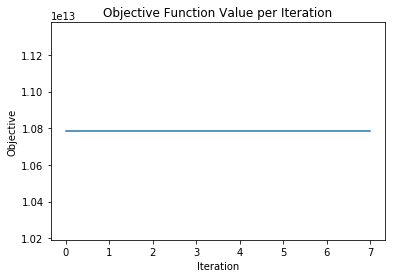

In [14]:
# Plot objective function value each iteration
model_score = glrmodel_2.score_history()
plt.xlabel("Iteration")
plt.ylabel("Objective")
plt.title("Objective Function Value per Iteration")
print(model_score)
plt.plot(model_score["iterations"], model_score["objective"])
plt.show()

Jason thought he remembered 'categorical' getting parsed differently from 'enum', hence the little loop below which changes all the dtypes to 'categorical'.  So I might want want to try a similar thing with just my enums and see what changes.

In [ ]:
types = {} 
for k in region_a_df.types: 
    types[k] = 'categorical' 
    types['C1'] = 'string' 
region_a_df = h2o.H2OFrame(np.array(region_answers)[:,1:], column_types=types) region_a_df.describe()

glrm.train(y=y, training_frame=region_a_df)

In [36]:
khous_h2.types

{'1stFlrSF': 'int',
 '2ndFlrSF': 'int',
 '3SsnPorch': 'int',
 'Alley': 'enum',
 'BedroomAbvGr': 'int',
 'BldgType': 'enum',
 'BsmtCond': 'enum',
 'BsmtExposure': 'enum',
 'BsmtFinSF1': 'int',
 'BsmtFinSF2': 'int',
 'BsmtFinType1': 'enum',
 'BsmtFinType2': 'enum',
 'BsmtFullBath': 'int',
 'BsmtHalfBath': 'int',
 'BsmtQual': 'enum',
 'BsmtUnfSF': 'int',
 'CentralAir': 'enum',
 'Condition1': 'enum',
 'Condition2': 'enum',
 'Electrical': 'enum',
 'EnclosedPorch': 'int',
 'ExterCond': 'enum',
 'ExterQual': 'enum',
 'Exterior1st': 'enum',
 'Exterior2nd': 'enum',
 'Fence': 'enum',
 'FireplaceQu': 'enum',
 'Fireplaces': 'int',
 'Foundation': 'enum',
 'FullBath': 'int',
 'Functional': 'enum',
 'GarageArea': 'int',
 'GarageCars': 'int',
 'GarageCond': 'enum',
 'GarageFinish': 'enum',
 'GarageQual': 'enum',
 'GarageType': 'enum',
 'GarageYrBlt': 'int',
 'GrLivArea': 'int',
 'HalfBath': 'int',
 'Heating': 'enum',
 'HeatingQC': 'enum',
 'HouseStyle': 'enum',
 'Id': 'int',
 'KitchenAbvGr': 'int',
 '